In [347]:
import pandas as pd
import os
import numpy as np

filename1 = 'Customer Attrition Status.csv'
filename2 = 'Customer Demographics.csv'
filename3 = 'Customer Investment Snapshot.csv'
filename4 = 'Customer Portfolio Snapshot.csv'

df1 = pd.read_csv(filename1)
df2 = pd.read_csv(filename2)
df3 = pd.read_csv(filename3)
df4 = pd.read_csv(filename4)

In [354]:
df1 = df1.sort_values(by='RowNumber')
df2 = df2.sort_values(by='RowNumber')
df3 = df3.sort_values(by='RowNumber')
df4 = df4.sort_values(by='RowNumber')

result1 = pd.merge(df4,df3,left_on=['RowNumber','CustomerId'],right_on=['RowNumber','CustomerId'],how='left')
result2 = pd.merge(result1,df2,left_on=['RowNumber','CustomerId'],right_on=['RowNumber','CustomerId'],how='left')
result = pd.merge(result2,df1,left_on=['RowNumber','CustomerId'],right_on=['RowNumber','CustomerId'],how='left')
#print(result)

result = result.reindex(['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasChckng','IsActiveMember','EstimatedSalary','Exited'],axis=1)
result = result.dropna(subset=['CustomerId'])
result = result.drop_duplicates()
result_corr = result.corr()
result_corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.009853,0.006332,-0.000440,-0.008020,-0.004741,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.009853,1.000000,0.005658,0.008627,-0.015261,-0.008690,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.006332,0.005658,1.000000,-0.004118,-0.001960,-0.003884,0.011966,-0.006044,0.025737,-0.002197,-0.027794
Age,-0.000440,0.008627,-0.004118,1.000000,-0.009025,-0.012822,-0.028665,-0.013279,0.082351,-0.009181,0.280904
Tenure,-0.008020,-0.015261,-0.001960,-0.009025,1.000000,0.005572,0.017197,0.023078,-0.029180,0.008055,-0.012178
Balance,-0.004741,-0.008690,-0.003884,-0.012822,0.005572,1.000000,-0.001027,0.006721,-0.020418,-0.001856,0.017208
NumOfProducts,0.007246,0.016972,0.011966,-0.028665,0.017197,-0.001027,1.000000,0.003183,0.009612,0.014204,-0.047820
HasChckng,0.000599,-0.014025,-0.006044,-0.013279,0.023078,0.006721,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025737,0.082351,-0.029180,-0.020418,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.002197,-0.009181,0.008055,-0.001856,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:xlabel='Geography', ylabel='count'>

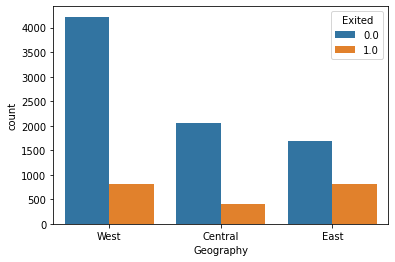

In [349]:
import seaborn as sns
missing_column = ['Balance','EstimatedSalary','CreditScore','Age','Tenure','NumOfProducts']
for i in missing_column:
    result.loc[result.loc[:,i].isnull(),i]=result.loc[:,i].median()
result = result.ffill()

sns.countplot(x="Geography",data=result,hue="Exited")

<AxesSubplot:xlabel='Gender', ylabel='count'>

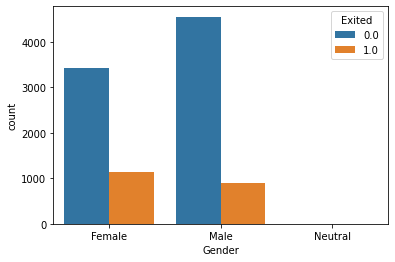

In [350]:
sns.countplot(x="Gender",data=result,hue="Exited")

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

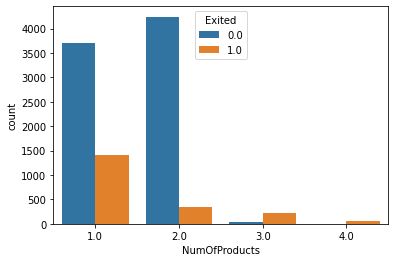

In [351]:
sns.countplot(x="NumOfProducts",data=result,hue="Exited")

<AxesSubplot:xlabel='HasChckng', ylabel='count'>

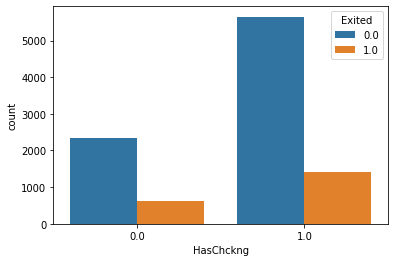

In [352]:
sns.countplot(x="HasChckng",data=result,hue="Exited")

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

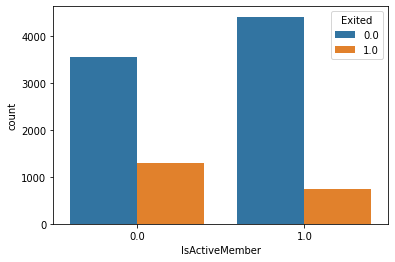

In [353]:
sns.countplot(x="IsActiveMember",data=result,hue="Exited")